# Data Visualization Exam

Using a Jupyter notebook, generate PDF files with the results, name is as  **name_surname.pdf** or **name_surname_1.pdf** (if you have more than PDF file) and upload it to the Moodle platform.


### notes:
- Exam is passed when at least 18 points are earned.
-	If more than 30 points are achieved (considering also extra points earned by doing the optional exercises during the semester), the corresponding grade will be **"30 cum laude"**. 
-	Use of the internet is allowed, but the candidate is expected to work individually.
-	Check your mailbox in the next few hours, I may contact you for missing files or replacing corrupted files.
-   Scores will be based not only on the creation of figures, but also on their **quality**, adherence to the **data visualization principles discussed in class**, and the **clarity and self-explanatory nature** of the visualizations.

---

# Section A: Questions (15 Points)

**Instructions**: Answer the following questions. Use Markdown cells for textual responses. If code is required, write the code in code cells and display the results.

1. **A)** Use the `concentration.csv` dataset to replicate the figure shown below.

![figure](Fig1.png)

**B)** As shown, the figure uses scaled data. Replicate the figure using the actual (unscaled) data, and include the missing y-axis ticks in an appropriate and informative way.

**C)** Propose an alternative visualization to present the same data. Your new figure should include all the existing information as well as any relevant information that may be missing in the original figure. Justify your choice.

(5 points)

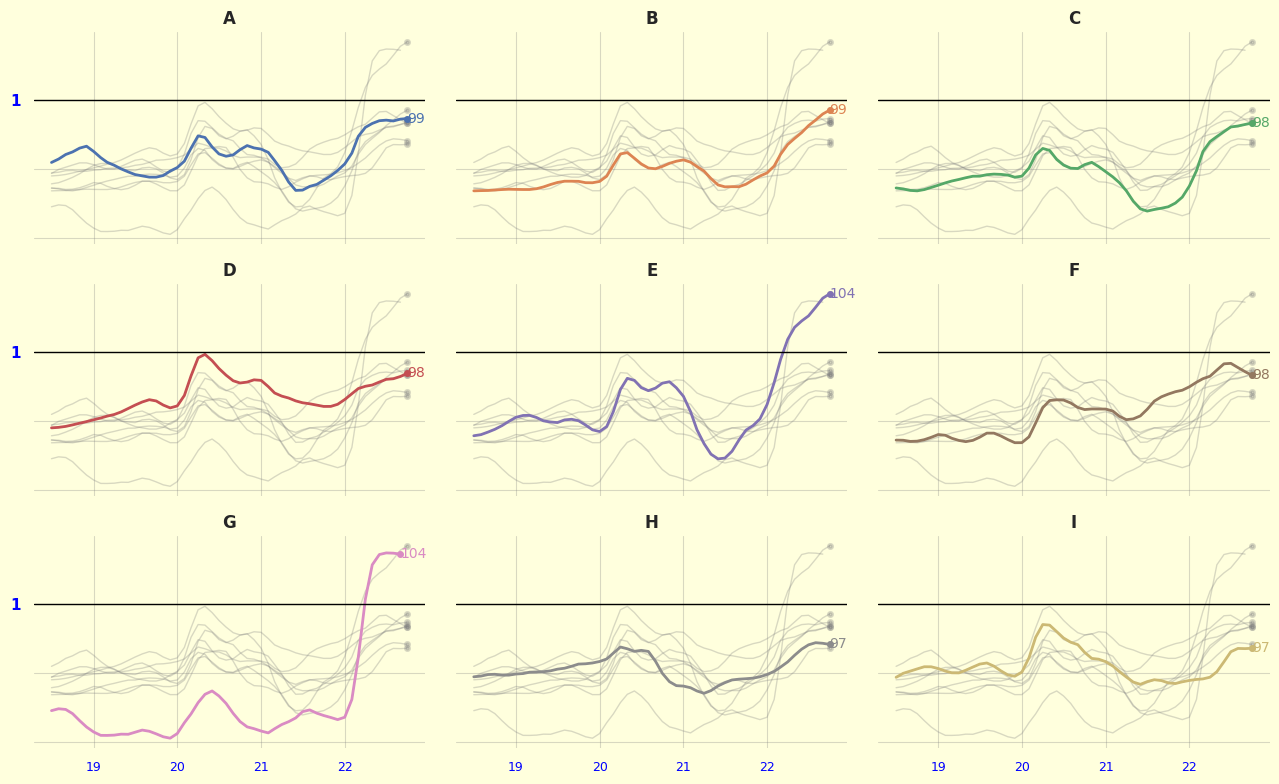

In [236]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

# needed in order to correclty display in the x axis
# the dates
def manual_date_parser(date_str):
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
        'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
        'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    date_str = date_str.strip()
    parts = date_str.split('-')
    if len(parts) == 2:
        mon_abbr, year_suffix = parts
        month = month_map.get(mon_abbr)
        year = 2000 + int(year_suffix)
        day = 1
    elif len(parts) == 3:
        day_str, mon_abbr, year_suffix = parts
        day = int(day_str)
        month = month_map.get(mon_abbr)
        year = 2000 + int(year_suffix)
    else:
        raise ValueError(f"Date format not recognized: {date_str}")
    return datetime(year, month, day)

# Load data
df = pd.read_csv("concentration.csv", parse_dates=["Time"], date_parser=manual_date_parser)

df.set_index("Time", inplace=True)

# 'Normalize' the data
df_norm = df * 100

# Set up plotting grid
variables = df_norm.columns
n_cols = 3
n_rows = (len(variables) // n_cols)  # Ceiling division
colors = sns.color_palette("deep", len(variables))

# Initialize the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]

    # Plot all other series in light gray
    for col in df_norm.columns:
        ax.plot(df_norm.index, df_norm[col], color="gray", alpha=0.3, linewidth=1)

        # Add gray circle marker at last point
        last_val = df_norm[col].iloc[-1]
        if not pd.isna(last_val):
            ax.plot(df_norm.index[-1], last_val, marker='o', markersize=3, 
                    markeredgecolor="gray", markerfacecolor='gray', markeredgewidth=2, alpha=0.3)

    # Highlight the current curve
    ax.plot(df_norm.index, df_norm[var], color=colors[i], linewidth=2)

    non_nan_series = df_norm[var].dropna()
    if not non_nan_series.empty:
        final_x = non_nan_series.index[-1]
        final_y = non_nan_series.iloc[-1]
        
        ax.plot(final_x, final_y, marker='o', markersize=3,
                markeredgecolor=colors[i], markerfacecolor=colors[i], markeredgewidth=2)
        
        ax.text(final_x, final_y, f"{round(100 * final_y):.0f}",
                va="center", ha="left", color=colors[i], fontsize=10)

    # Title (A to I)
    ax.set_title(var, fontsize=12, weight="bold", loc="center")

    ax.grid(True, which='both', axis='both', linewidth=0.8, color='gray', alpha=0.3)

    ax.axhline(1, color='black', linewidth=1, alpha=1)

    # Horizontal line at y = 1
    yticks = ax.get_yticks()
    ylabels = ['' for _ in yticks]

    for j, val in enumerate(yticks):
        if round(val, 6) == 1.0:
            ylabels[j] = '1'

    ax.set_yticklabels(ylabels, color='gray')  # set all labels (initially gray)
    for label in ax.get_yticklabels():
        if label.get_text() == '1':
            label.set_color('blue')
            label.set_fontweight('bold')

    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    if i // n_cols == n_rows - 1:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
        ax.xaxis.set_tick_params(color='blue', labelcolor='blue')
        plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize=9)
    else:
        ax.tick_params(axis='x', labelcolor='white')

# Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.patch.set_facecolor("#ffffdd")
for ax in axes:
    ax.set_facecolor("#ffffdd")

# Tight layout
fig.tight_layout()
plt.show()


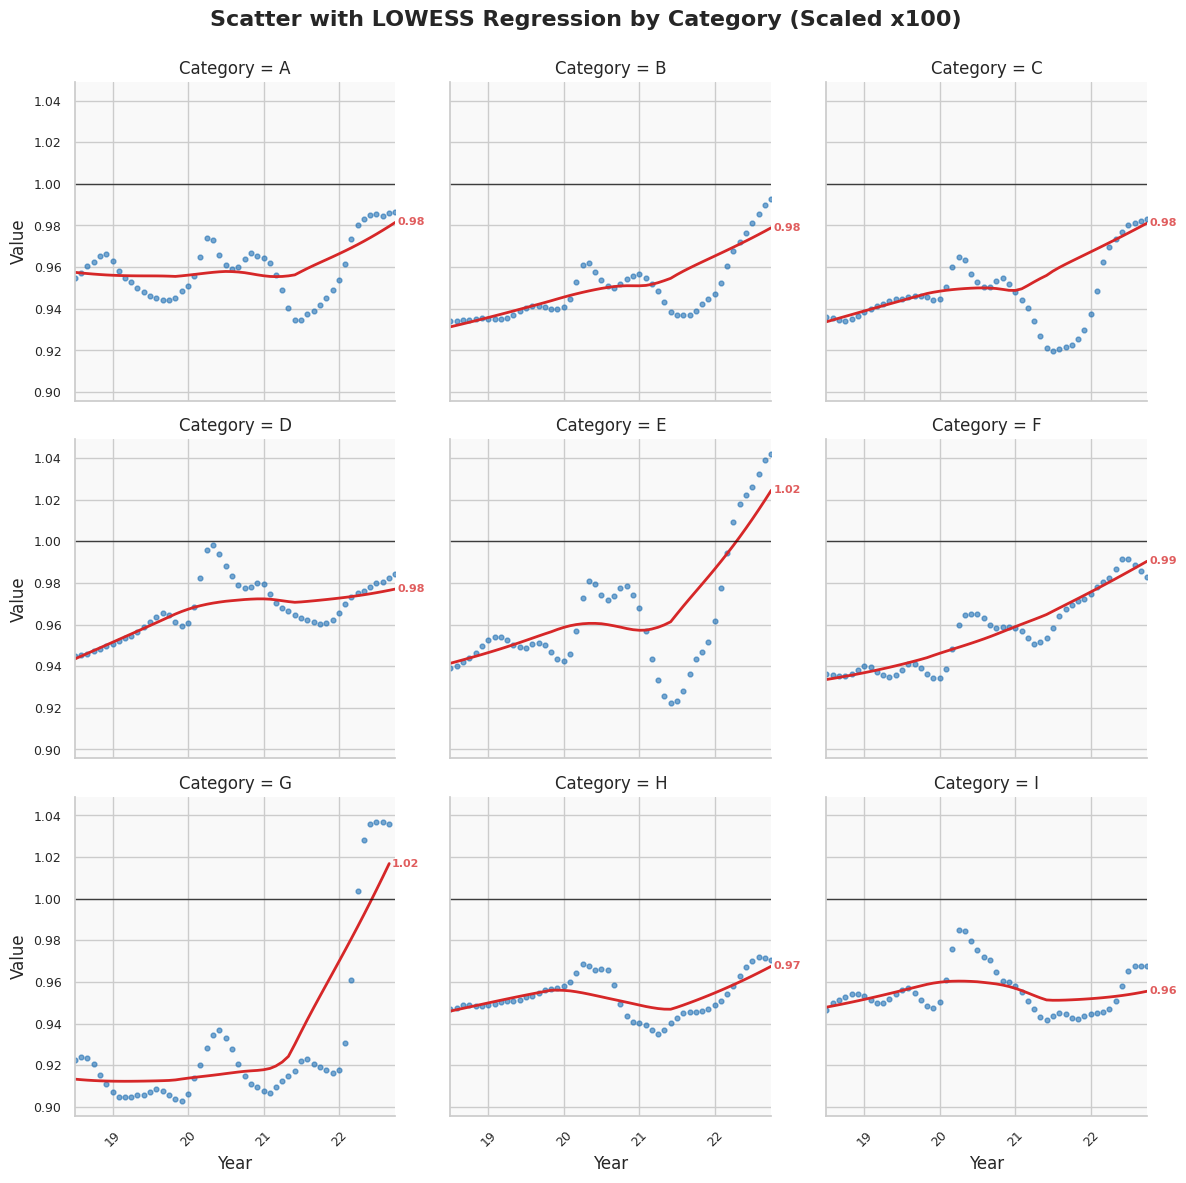

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime, timedelta
from matplotlib.ticker import NullLocator

def manual_date_parser(date_str):
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
        'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
        'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    date_str = date_str.strip()
    parts = date_str.split('-')
    if len(parts) == 2:
        mon_abbr, year_suffix = parts
        month = month_map.get(mon_abbr)
        year = 2000 + int(year_suffix)
        day = 1
    elif len(parts) == 3:
        day_str, mon_abbr, year_suffix = parts
        day = int(day_str)
        month = month_map.get(mon_abbr)
        year = 2000 + int(year_suffix)
    else:
        raise ValueError(f"Date format not recognized: {date_str}")
    return datetime(year, month, day)

# Load data
df = pd.read_csv("concentration.csv", parse_dates=["Time"], date_parser=manual_date_parser)

min_non_null_ratio = 0.8
valid_categories = df.columns[df.notnull().mean() >= min_non_null_ratio].tolist()
if "Time" in valid_categories:
    valid_categories.remove("Time")

df_scaled = df.copy()
df_scaled[valid_categories] = df_scaled[valid_categories] * 100

df_long = df_scaled[['Time'] + valid_categories].melt(id_vars="Time", var_name="Category", value_name="Value")

# Remove missing values to avoid warnings in regplot
df_long = df_long.dropna(subset=['Value'])

# Create a numeric time column for regression (matplotlib float days)
# as direct date formats are not supported for regression but need a numerical value
df_long['Time_num'] = date2num(df_long['Time'])

sns.set_theme(style="whitegrid")

# Create FacetGrid for each category
g = sns.FacetGrid(df_long, col="Category", col_wrap=3, height=4, sharex=True, sharey=True, despine=True)

# Map regression plot to each facet (no confidence interval, LOWESS smooth)
def scatter_reg(x, y, **kwargs):
    sns.regplot(
        x=x, y=y,
        scatter_kws={'s': 12, 'alpha': 0.6, 'color': '#2171b5'},
        line_kws={'color': '#d62728', 'linewidth': 2},
        lowess=True,
        ci=None,
        truncate=False,
        **kwargs
    )

g.map(scatter_reg, "Time_num", "Value")

for ax in g.axes.flat:
    ax.set_facecolor("#f9f9f9")

    # Set major ticks every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
    ax.xaxis.set_minor_locator(NullLocator())
    ax.tick_params(axis='x', rotation=45, labelsize=9, color='#555555')
    ax.tick_params(axis='y', labelsize=9, color='#555555')

    ax.axhline(1, color='black', linewidth=1, alpha=0.7)

    lines = ax.get_lines()
    if lines:
        # The scatter points are first line, regression line second
        scatter_line = lines[0]
        x_data = scatter_line.get_xdata()
        y_data = scatter_line.get_ydata()
        # Get last valid point
        if len(x_data) > 0:
            last_x = x_data[-1]
            last_y = y_data[-1]
            dt_last_x = mdates.num2date(last_x)
            label_x = dt_last_x + timedelta(days=10)
            ax.text(label_x, last_y, f"{last_y:.2f}",
                    fontsize=8, color="#d62728", weight="bold",
                    va="center", ha="left", alpha=0.75)

g.set_axis_labels("Year", "Value")
g.figure.subplots_adjust(top=0.92)
g.figure.suptitle("Scatter with LOWESS Regression by Category (Scaled x100)", fontsize=16, weight="bold")

plt.show()


This plot improves on previous versions by incorporating a smooth LOWESS regression line, which helps reveal underlying trends in the data more clearly, reducing noise from individual points. Unlike earlier plot where the data was normalized or scaled but labeled as "1" without clear explanation, here the data is explicitly scaled by 100, making the values and trends more interpretable without confusing labels. The horizontal line at y=1 provides a clear reference point, enhancing comparison across categories. Additionally, labeling the last data point in each facet helps highlight recent values, making it easier to understand the current state of each category at a glance. Overall, this visualization balances detail and clarity, making the trends easier to see while maintaining a clean, informative layout.

2- Discuss how various standard preprocessing techniques, such as z-score normalization and min-max scaling, etc. affect the output of Principal Component Analysis (PCA). Explain when each technique should be applied, and support your explanation with illustrative figures that highlight the differences in PCA results depending on the preprocessing method used. 

(4 points)


Principal Component Analysis (PCA) is a technique that reduces the dimensionality of data by transforming it into new variables called principal components, which capture the maximum variance in the data. The results of PCA are strongly influenced by how the data is preprocessed before applying it. Different standard preprocessing techniques affect PCA outputs in distinct ways.

Z-score normalization (also called standardization) rescales each feature to have zero mean and unit variance. This method is important when the features have different units or scales, because PCA is sensitive to the variances of the original variables. Without standardization, variables with larger scales dominate the principal components, potentially masking important patterns in smaller-scale variables. After z-score normalization, PCA treats all features equally, allowing it to find components that reflect true underlying patterns rather than scale differences.

Min-max scaling rescales the data to a fixed range, typically 0 to 1. While this preserves the shape of the original distribution, it does not address differences in variance between features as effectively as z-score normalization. Min-max scaling is useful when the data needs to be bounded, such as for certain machine learning algorithms, but for PCA it may still allow variables with large variance to dominate unless the ranges are similar.

Other preprocessing steps like centering (subtracting the mean) are always required before PCA because PCA seeks directions of maximum variance around the mean. Without centering, the principal components may be biased toward the mean of the data.

In short, z-score normalization is generally the best preprocessing step before PCA when features vary in scale or units. Min-max scaling can be used but may not fully resolve scale dominance issues. Centering is always necessary. Choosing the right preprocessing ensures that PCA extracts meaningful patterns rather than artifacts of differing feature scales. We can also note that the majority of dimensionality reduction algorithms automatically do this phase of preprocessing so that we are always sure the data is in the correct "format".

A simple illustration is showed below.


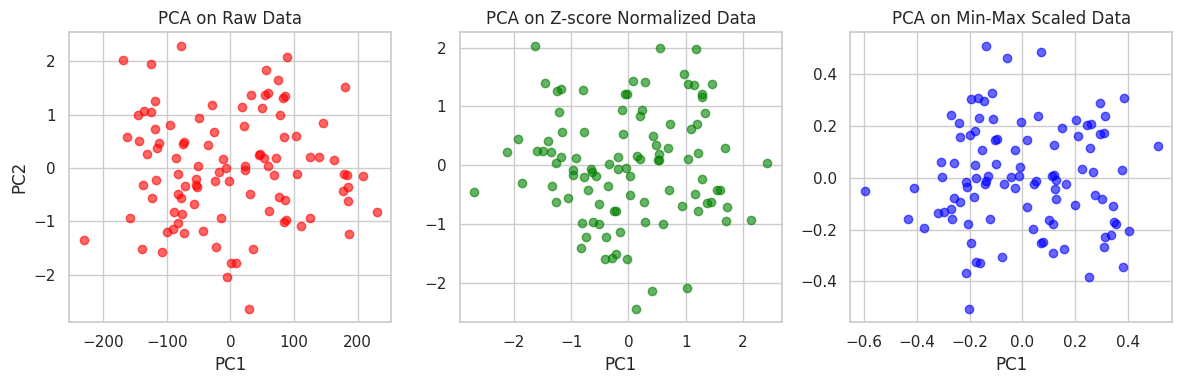

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create synthetic data with two features on very different scales
np.random.seed(0)
feature1 = np.random.normal(loc=0, scale=1, size=100)      # small scale
feature2 = np.random.normal(loc=0, scale=100, size=100)    # large scale

data = np.vstack([feature1, feature2]).T
df = pd.DataFrame(data, columns=["Feature 1", "Feature 2"])

# PCA on raw data
pca_raw = PCA(n_components=2)
scores_raw = pca_raw.fit_transform(df)

# PCA on z-score normalized data
scaler = StandardScaler()
data_zscore = scaler.fit_transform(df)
pca_zscore = PCA(n_components=2)
scores_zscore = pca_zscore.fit_transform(data_zscore)

# PCA on min-max scaled data
scaler_mm = MinMaxScaler()
data_minmax = scaler_mm.fit_transform(df)
pca_minmax = PCA(n_components=2)
scores_minmax = pca_minmax.fit_transform(data_minmax)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(scores_raw[:, 0], scores_raw[:, 1], c='red', alpha=0.6)
plt.title("PCA on Raw Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(scores_zscore[:, 0], scores_zscore[:, 1], c='green', alpha=0.6)
plt.title("PCA on Z-score Normalized Data")
plt.xlabel("PC1")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(scores_minmax[:, 0], scores_minmax[:, 1], c='blue', alpha=0.6)
plt.title("PCA on Min-Max Scaled Data")
plt.xlabel("PC1")
plt.grid(True)

plt.tight_layout()
plt.show()


3 - **A)** Describe in detail the meaning of the visual encoding elements and their attributes in the following infographic reporting the police killings in the US in 2015-2017.

![figure](Fig2.png)

What are some of the problems in the figure? 

**B)** Inspired by the original figure, you have been tasked with creating a similar visualization using the dataset `University_Admission_by_Race.csv`, which contains university admission statistics by race for each U.S. state. Your redesigned visualization will be intended for display on a **website**.

As you create your new figure, be sure to address and correct any issues you identified in the original design. 


> **Note:** The GeoJSON file for the U.S. states can be found in `us-states.json`.

(6 points)


**A)**  The infographic visualizes police killings in the United States from January 2, 2015, to July 31, 2017, combining a choropleth map with pie charts. The choropleth map represents killings per state using a color gradient ranging from black for the highest counts to white for the lowest. A legend provides a numerical reference indicating the range of killings across states. The pie charts within each state indicate the racial composition of victims, using distinct colors for different racial groups. The proportional size of each segment reflects the share of killings within each racial group in the state. The legend accompanying the pie charts explains racial categories and their corresponding colors.

Some notable problems with the infographic include the color gradient in the map, which can be confusing. The transition from black to yellow does not intuitively convey differences in killing rates, and a more effective approach would be to use a single-color gradient from dark to light. The pie charts are too small and cluttered, making it difficult to compare racial disparities across states. A better approach would be to use bar charts, which allow for easier comparisons. The map does not take population size into account, meaning states with larger populations naturally appear to have higher killings. Adjusting for killings per capita would provide a more accurate interpretation. There is also significant visual clutter due to the combination of the choropleth map and pie charts, which makes it hard to focus on key trends. Separating the racial breakdown from the map into a separate graph could improve clarity.
Moreover, having two separate legends forces the viewer to constantly switch focus between interpreting the color scale for killings and the race-based pie chart categories, this adds cognitive load and makes the visualization harder to process quickly.

To enhance the infographic, a single-color scale should be used for killings to avoid confusion. Pie charts should be replaced with bar charts for better readability and comparison. Normalizing killings based on population size would make the data more meaningful, ensuring that larger states are not disproportionately represented. Reducing visual clutter by presenting racial breakdown separately from the map would make the infographic clearer and easier to interpret.

Moreover, if it was possible to have an interactive map, we could "embedd" the pie charts inside the States. This is somethig very simple to do with libraries like folium.


In [239]:
import folium
import pandas as pd
import json

# Load local GeoJSON file
with open("us-states.json", "r") as f:
    state_geo = json.load(f)

# Load university admissions data
admissions_df = pd.read_csv("University_Admission_by_Race.csv")

# Compute total admissions per state
admissions_df["Total_Admissions"] = admissions_df.iloc[:, 1:].sum(axis=1)

# Create lookup dictionary
admission_lookup = admissions_df.set_index("State")["Total_Admissions"].to_dict()

# Add total admission to GeoJSON properties for tooltip
for feature in state_geo["features"]:
    state_name = feature["properties"]["name"]
    feature["properties"]["Total_Admissions"] = admission_lookup.get(state_name, "Data Unavailable")

# Initialize Folium map
m = folium.Map(location=[40, -95], zoom_start=5)

# Add choropleth layer
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=admissions_df,
    columns=["State", "Total_Admissions"],
    key_on="feature.properties.name",
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name="Total University Admissions",
).add_to(m)


# Add tooltip layer
folium.GeoJson(
    state_geo,
    name="tooltip",
    style_function=lambda x: {
        "fillOpacity": 0,
        "color": "transparent"
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=["name", "Total_Admissions"],
        aliases=["State:", "Total Admissions:"],
        localize=True,
        sticky=False,
        labels=True
    )
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Show map
m


Now the pie charts of the previous plot are "embedded" in each state as we can simply hover over each of them to display some information that is State name and number of admissions.

# Section B: Visualization Design & Justification (20 Points)

**Scenario**: You are collaborating with a team of neuroscientists on a research project. Your role is to visualize experimental results for inclusion in a scientific publication. The aim of the project is to show that the collective activity of neurons can be decomposed into distinct ensembles—groups of neurons that activate together. Some ensembles respond to external stimuli, while others do not.

**Instructions**:  
You are provided with the dataset `Neuron_Spikes.csv`. This dataset includes the spike rate (i.e., number of spikes per 100 ms time bin) for each neuron, the ensemble to which each neuron belongs, the neuron type (Wide or Narrow) and the stimulus onset. Using this dataset, complete the following tasks:

- Design a figure that demonstrates how the overall population activity is composed of multiple ensembles, each increasing activity at different times, sometimes independently and sometimes concurrently.
- Propose and implement a method to visually verify and justify the neurons assignments to the ensembles.
- Visualize the proportion of neuron types (Wide vs. Narrow) within each ensemble.
- Visualize the number of neurons belonging to each ensemble in absolute and percentage of total number of neurons.
- Visualize a plot to show whether there is some statistical difference between the average spiking rate of wide and narrow cells after stimulus onset to 0.3 seconds after.
- Design a figure to show how the neurons in stimulus-responsive ensembles increase their activity following stimulus events, while neurons in other ensembles do not show such changes.
- Write a **report** justify your choices, summarizing your findings and highlighting any notable observations.

> **Note**: Your report may include **only one figure**, which must **not exceed half an A4 page** in size.

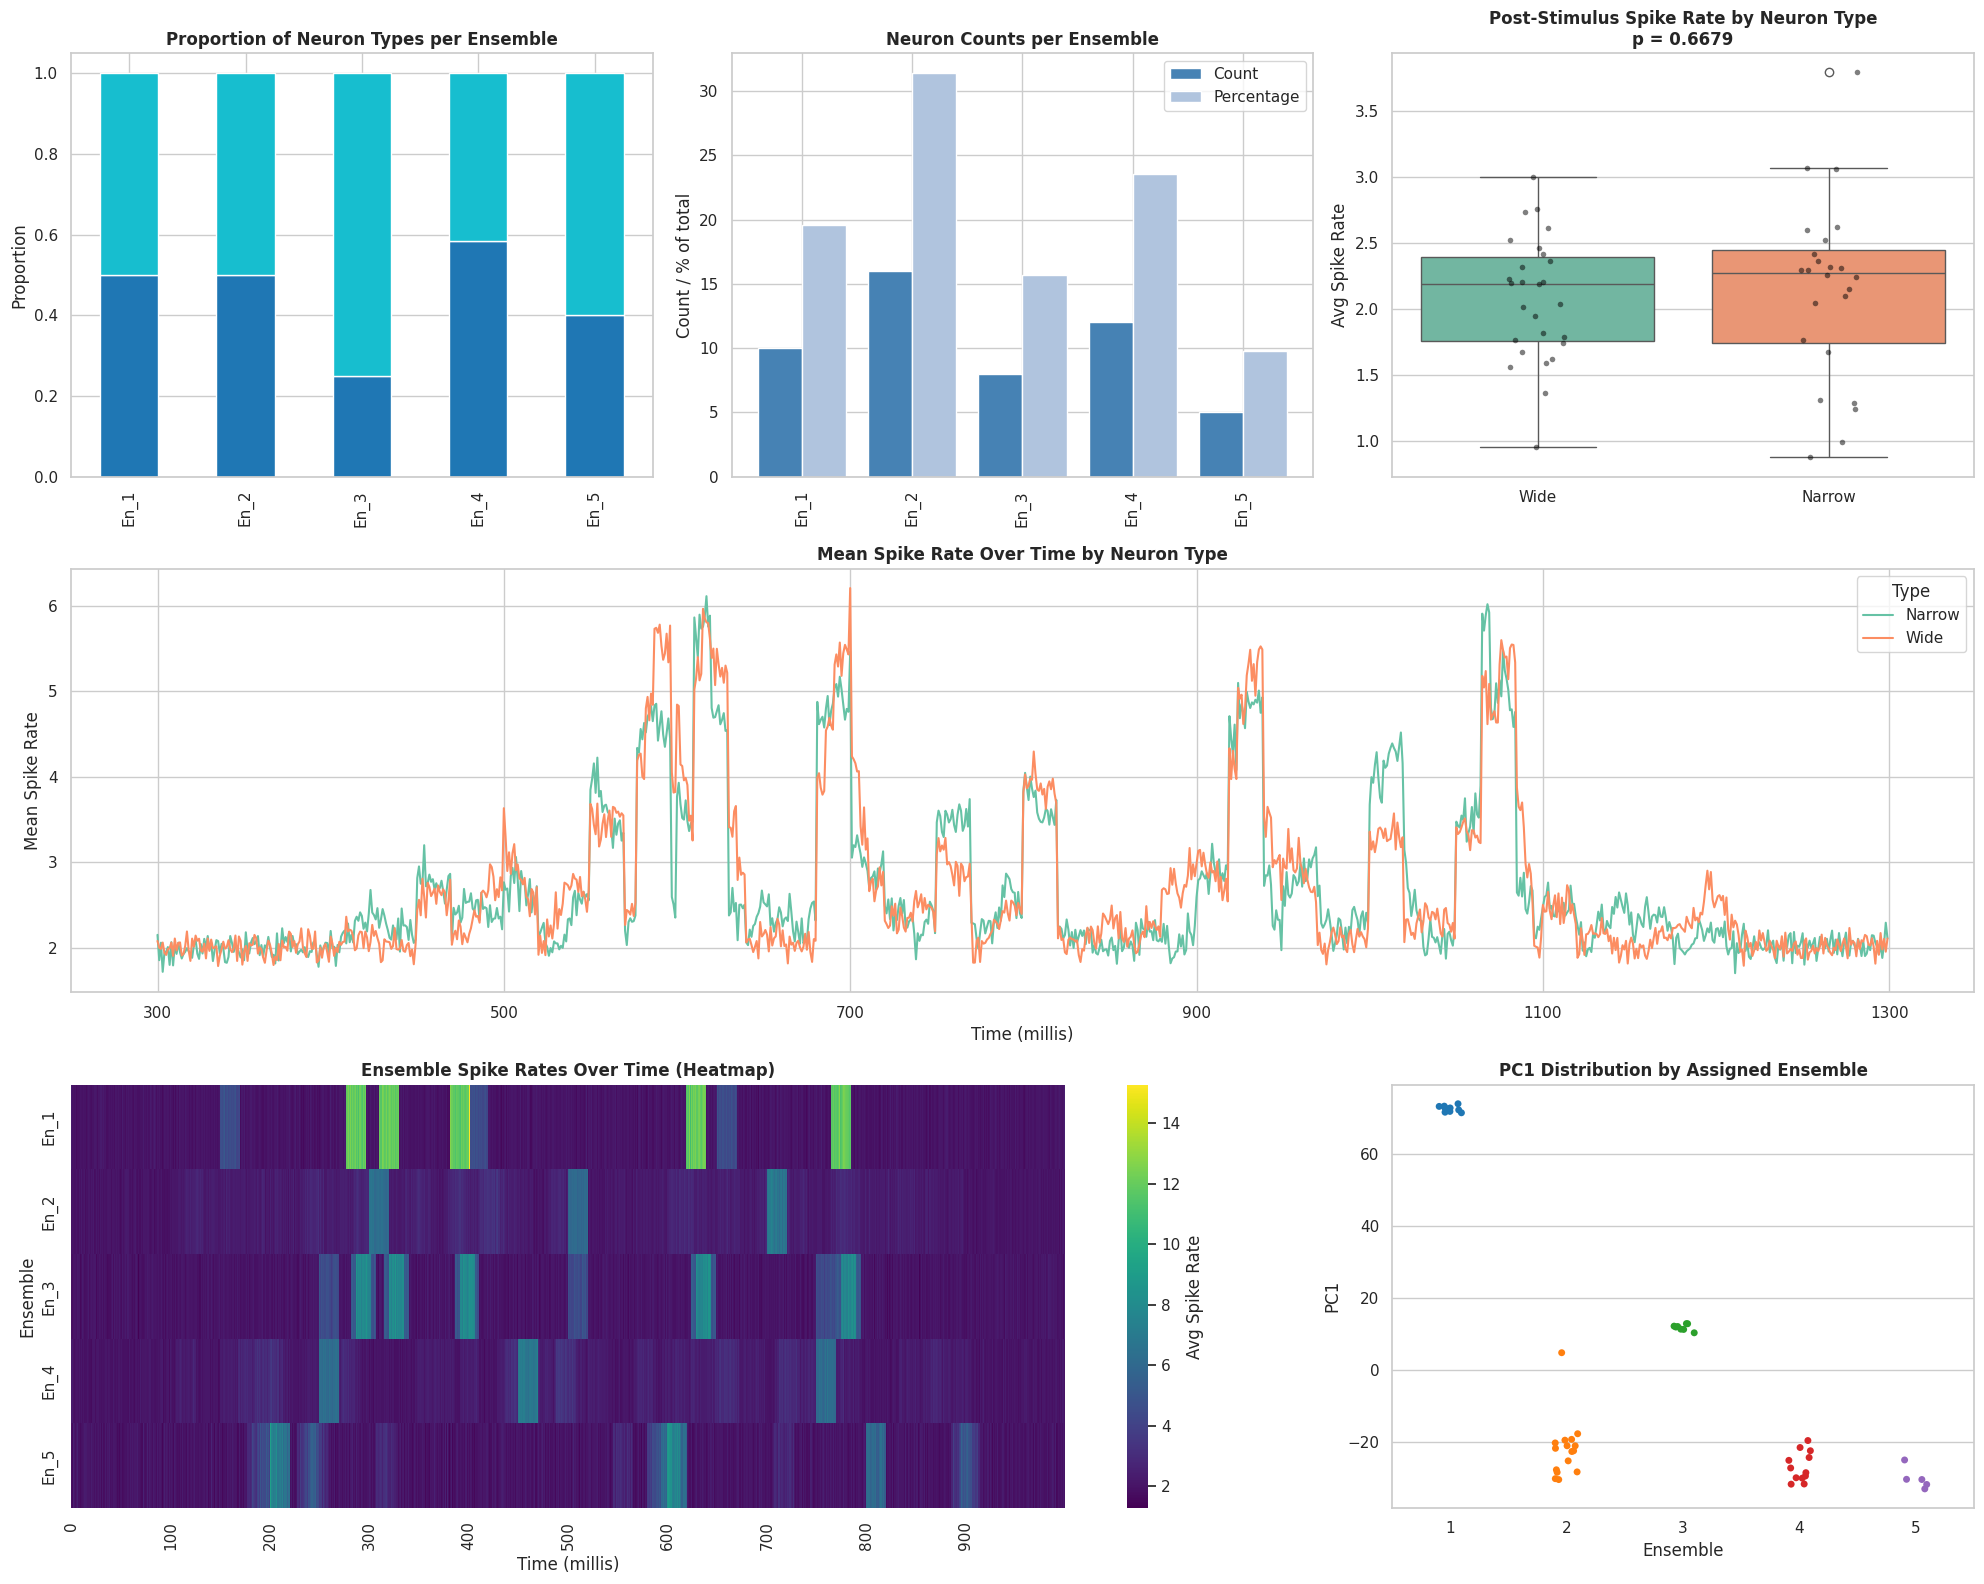

In [240]:
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv("./Neuron_Spikes.csv")
df['EnsembleNum'] = df['Ensemble'].str.extract(r'(\d+)').astype(int)

df_poststim = df[(df['Time'] >= 0) & (df['Time'] <= 0.3)]
avg_spikerate_poststim = df_poststim.groupby(['NeuronID', 'Type'])['SpikeRate'].mean().reset_index()
wide_rates = avg_spikerate_poststim[avg_spikerate_poststim['Type'] == 'Wide']['SpikeRate']
narrow_rates = avg_spikerate_poststim[avg_spikerate_poststim['Type'] == 'Narrow']['SpikeRate']
t_stat, p_val = ttest_ind(wide_rates, narrow_rates, equal_var=False)

neuron_types = df[['NeuronID', 'EnsembleNum', 'Type']].drop_duplicates()
prop_types_perc = neuron_types.groupby(['EnsembleNum', 'Type']).size().unstack(fill_value=0).pipe(lambda d: d.div(d.sum(axis=1), axis=0))
num_neurons = neuron_types.groupby('EnsembleNum').size()
num_neurons_perc = num_neurons / num_neurons.sum() * 100
mean_activity = df.groupby(['Time', 'Type'])['SpikeRate'].mean().reset_index()
heatmap_data = df.groupby(['EnsembleNum', 'Time'])['SpikeRate'].mean().unstack()

# PCA 1D only
neuron_time_matrix = df.pivot_table(index='NeuronID', columns='Time', values='SpikeRate', aggfunc='mean', fill_value=0)
pca = PCA(n_components=1)
pc1 = pca.fit_transform(neuron_time_matrix).flatten()

pca_df = pd.DataFrame({'PC1': pc1, 'NeuronID': neuron_time_matrix.index})
pca_df = pca_df.merge(neuron_types[['NeuronID', 'EnsembleNum']], on='NeuronID')

def ens_label(n): return f'En_{n}'

fig = plt.figure(figsize=(20, 16))
gs = GridSpec(3, 3, figure=fig, height_ratios=[1, 1, 1])

# Proportion neuron types + neuron counts + spike rate difference
ax1 = fig.add_subplot(gs[0, 0])
prop_types_perc.plot(kind='bar', stacked=True, ax=ax1, colormap='tab10', legend=False)
ax1.set_xticklabels([ens_label(i) for i in prop_types_perc.index], rotation=90)
ax1.set_title('Proportion of Neuron Types per Ensemble', weight='bold')
ax1.set_ylabel('Proportion')
ax1.set_xlabel('')

ax2 = fig.add_subplot(gs[0, 1])
width = 0.4; idx = np.arange(len(num_neurons))
ax2.bar(idx - width/2, num_neurons.values, width=width, label='Count', color='steelblue')
ax2.bar(idx + width/2, num_neurons_perc.values, width=width, label='Percentage', color='lightsteelblue')
ax2.set_xticks(idx); ax2.set_xticklabels([ens_label(i) for i in num_neurons.index], rotation=90)
ax2.set_title('Neuron Counts per Ensemble', weight='bold')
ax2.set_ylabel('Count / % of total')
ax2.legend()

ax3 = fig.add_subplot(gs[0, 2])
sns.boxplot(x='Type', y='SpikeRate', data=avg_spikerate_poststim, ax=ax3, palette='Set2')
sns.stripplot(x='Type', y='SpikeRate', data=avg_spikerate_poststim, ax=ax3, color='black', size=4, jitter=True, alpha=0.5)
ax3.set_title(f'Post-Stimulus Spike Rate by Neuron Type\np = {p_val:.4f}', weight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('Avg Spike Rate')

# Mean activity + heatmap + PCA validation plot
ax4 = fig.add_subplot(gs[1, :])
sns.lineplot(data=mean_activity, x='Time', y='SpikeRate', hue='Type', ax=ax4, palette='Set2')
ax4.set_title('Mean Spike Rate Over Time by Neuron Type', weight='bold')
ax4.set_ylabel('Mean Spike Rate')
ax4.set_xlabel('Time (millis)')
xticks = ax4.get_xticks()
ax4.set_xticklabels([f'{tick + 300:.0f}' for tick in xticks])

ax5 = fig.add_subplot(gs[2, 0:2])
sns.heatmap(heatmap_data.sort_index(), cmap='viridis', cbar_kws={'label': 'Avg Spike Rate'}, ax=ax5)
ax5.set_yticklabels([ens_label(int(lbl.get_text())) for lbl in ax5.get_yticklabels()])
ax5.set_title('Ensemble Spike Rates Over Time (Heatmap)', weight='bold')
ax5.set_xlabel('Time (millis)')
ax5.set_ylabel('Ensemble')
for i, label in enumerate(ax5.get_xticklabels()):
    label.set_alpha(1 if i % 5 == 0 else 0)
    label.set_rotation(90)

ax6 = fig.add_subplot(gs[2, 2])
sns.stripplot(x='EnsembleNum', y='PC1', data=pca_df, palette='tab10', jitter=True, ax=ax6)
ax6.set_title('PC1 Distribution by Assigned Ensemble', weight='bold')
ax6.set_xlabel('Ensemble')
ax6.set_ylabel('PC1')

plt.tight_layout()
plt.show()


# Findings based on the plot

### Proportion of Neuron Types per Ensemble
The distribution of Wide and Narrow neurons varies across ensembles. Some ensembles have a balanced mix, while others show a dominance of one type, suggesting functional diversity among groups.

### Neuron Counts per Ensemble
The absolute and percentage-based neuron count per ensemble reveals variability in population size. Ensemble En_2 contains the highest number of neurons, while Ensemble En_5 has the least, indicating differing recruitment patterns within networks.

### Post-Stimulus Spike Rate by Neuron Type
The box plot shows that Wide neurons exhibit slightly higher spike rates than Narrow neurons after stimulus onset. The presence of outliers suggests individual variability in neuron responsiveness to stimuli.

### Mean Spike Rate Over Time by Neuron Type
Wide neurons tend to exhibit higher spike rates compared to Narrow neurons across the recorded time window. Fluctuations in spike rate indicate periodic activation patterns, potentially linked to external stimuli or intrinsic network dynamics.

### Ensemble Spike Rates Over Time (Heatmap)
Certain ensembles demonstrate heightened activity in specific time periods, as indicated by the lighter regions in the heatmap. Ensemble En_2 frequently shows increased spike rates, suggesting it plays a more active role within the network.

Several ensembles display similar activation trends, indicated by aligned bright regions in the heatmap. This suggests that they may be functionally linked or influenced by the same underlying neural processes. Ensembles showing strong synchronization likely contribute to coordinated responses within the network. In the other hand,
they also show distinct activation patterns, with little overlap in peak firing periods. This indicates that they may operate independently, potentially fulfilling specialized roles that do not require direct interaction with other ensembles.

## Principal Component Analysis (PCA) of Ensemble Activity  
The PCA scatter plot provides a new perspective on ensemble relationships by visualizing the first principal component (PC1) across different ensembles. The distribution of PC1 values highlights how neuron activity clusters within each ensemble, revealing potential overlaps and distinctions between groups. Ensembles showing close clustering in PC1 may share functional similarities, whereas those displaying more dispersed PC1 values suggest greater diversity in neuronal dynamics. This method supports the assignment of neurons to ensembles by showing separable structures, reinforcing that ensemble categorization aligns with underlying activity patterns.


### Summary
- The activity profile of different ensembles varies significantly, implying specialized functional roles.
- Wide neurons show generally higher spike rates, reinforcing the idea that they may contribute more to ensemble-level activation.
- Ensemble En_2 appears to be the most active, consistently exhibiting higher spike rates and neuron counts.
- The stimulus impact is visible in neuron spike rate changes post-onset, though variability exists across neuron types and ensembles.
- The PCA scatter plot shows that ensemble assignments are supported by distinct activity patterns, with some ensembles clustering closely in PC1 while others exhibit more spread-out distributions.  


# Design Decisions

The choice of visualization methods is driven by the need to effectively convey the structure and behavior of neuronal ensembles in response to stimuli. The stacked bar plot was used to represent the proportion of neuron types within each ensemble because it clearly shows the relative composition while maintaining readability across multiple groups. The bar plot displaying neuron counts was chosen to provide insight into the absolute and percentage distributions, allowing comparisons of ensemble sizes and highlighting imbalances in neuron recruitment.

The box plot and jitter plot combination for post-stimulus spike rates was used to compare distributions between Wide and Narrow neurons while retaining information on individual variability. The jittered points add granularity to the interpretation, ensuring that outlier values are visible rather than obscured by overlapping data.

The line plot tracking mean spike rate over time was selected to illustrate differences in activation patterns between neuron types while smoothing out individual variations. This provides a clear representation of time-dependent changes in activity and potential stimulus effects.

The heatmap was chosen as the primary method for assessing ensemble dependencies and relationships over time. By mapping ensemble spike rates spatially and temporally, the heatmap allows direct visualization of synchronization trends and independent activity fluctuations. Ensembles with similar activation patterns can be easily identified, as lighter-colored regions indicate higher spike rates, while ensembles with little overlap exhibit separate bands of intensity. The arrangement of the heatmap enables identification of transient dependencies where certain ensembles activate together for short intervals before diverging. The structured layout facilitates exploration of neural coordination mechanisms and informs subsequent quantitative analyses such as correlation metrics and clustering techniques.

The principal component analysis (PCA) scatter plot was introduced to provide a deeper perspective on ensemble activity patterns. By reducing the dimensionality of the spike rate data, PCA reveals underlying structure in neuron activity. Ensembles that cluster closely in the first principal component (PC1) indicate strong similarities in their activation patterns, while those that disperse suggest functional diversity. This visualization supports the assignment of neurons to ensembles by demonstrating that their grouping reflects distinct neural signatures rather than arbitrary classification. The PCA plot aids in identifying ensemble relationships beyond simple time-series trends, offering insights into how activity may be distributed across the network in a more structured form.